In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd
import numpy as np
np.random.seed(0)

In [5]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['Species']=pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df['is_train']=np.random.uniform(0,1,len(df))<=-.75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,is_train
0,5.1,3.5,1.4,0.2,setosa,False
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,False


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.3)

In [26]:
clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
print(f"Accuracy of the Decision Tree Classifier on the Training Set: {clf.score(X_train, y_train)}")
print(f"Accuracy of the Decision Tree Classifier on the Test Set: {clf.score(X_test, y_test)}")

Accuracy of the Decision Tree Classifier on the Training Set: 1.0
Accuracy of the Decision Tree Classifier on the Test Set: 0.9555555555555556


In [29]:
feature_imp=pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.450696
petal width (cm)     0.432922
sepal length (cm)    0.092610
sepal width (cm)     0.023772
dtype: float64

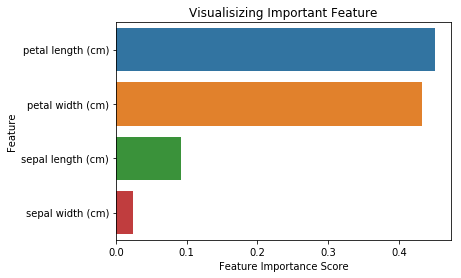

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Visualisizing Important Feature")
plt.show()

In [33]:
#Random Forest Regression 
rng=np.random.RandomState(42)
x=10*rng.rand(200)

In [34]:
def model(x, sigma=0.3):
    fast_oscillation=np.sin(5*x)
    slow_oscillation=np.sin(0.5*x)
    noise=sigma*rng.randn(len(x))
    
    return slow_oscillation+fast_oscillation+noise 

<ErrorbarContainer object of 3 artists>

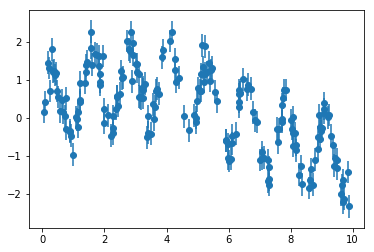

In [35]:
y=model(x)
plt.errorbar(x,y,0.3, fmt='o')

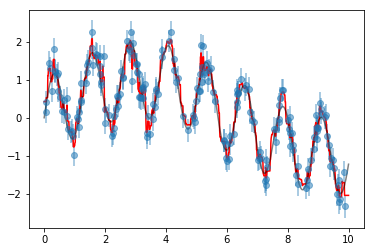

In [36]:
from sklearn.ensemble import RandomForestRegressor 
forest=RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit=np.linspace(0,10,1000)
yfit=forest.predict(xfit[:, None])
ytrue=model(xfit, sigma=0)

plt.errorbar(x,y,0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha=0.5)

In [37]:
#Classifying digit data
from sklearn.datasets import load_digits
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

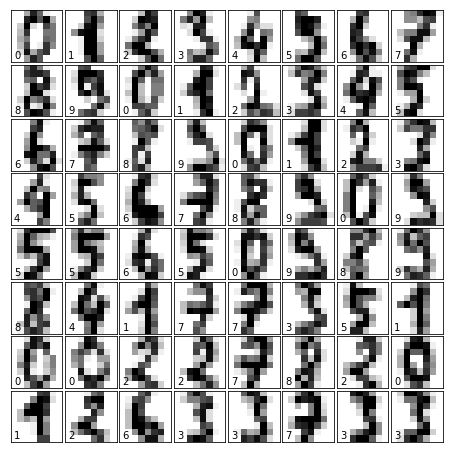

In [39]:
#Visualize the data points

#Set up the figure
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#plot the digits: each image is 8*8
for i in range(64):
    ax=fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0,7,str(digits.target[i]))

In [41]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, random_state=0)

In [43]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred=model.predict(X_test)

In [44]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



Text(91.68,0.5,'predicted label')

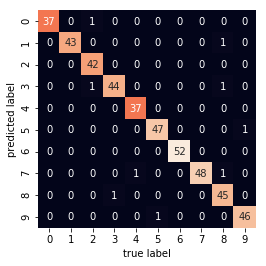

In [45]:
#plot the confusion metrics
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')